## Introduction

_This is a rework of an original project portfolio._




I have completed Datacamp's career track "Data Scientist with Python". It consists of 22 online courses involving 84 hours of lectures and exercises. 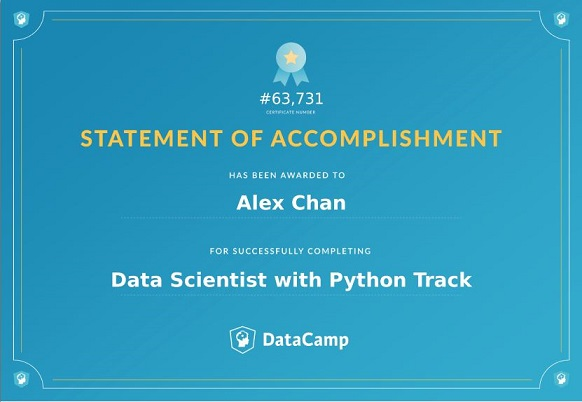



With this certificate, I intend to apply for the AI Apprenticeship Programme found here: https://www.aisingapore.org/industryinnovation/aiap/

While going through the online application, I encountered the following 2 questions: 
    
    AIAP is self-directed, why do you think you would be a good fit for it? *

    Tell us about a technical project you are proud of and elaborate about your role in it. *


I decided to apply what I have recently learned in DataCamp's career track, put them in a Jupyter Notebook and post it to GitHub, a portfolio of sorts. 

I knew of Kaggle and tinkered or rather followed the solutions to competitions. I am aware that the AIAP will have a machine learning component that is part of a 48-hour assessment. So why did I not submit a Kaggle kernel for a machine learning competition? Well, at this late stage, I cannot pretend that I can do up a machine learning kernel all by myself. I can only fork other people's kernel and try to improve on the score with the limited time that I have before the deadline. But doing that would hardly be impressive _(unless I miraculously got into the top 10 postions)_ so I reckon that I should instead attempt to gauge my chances of getting into the AIAP.



## Data, data where art thou?

That's the starting point isn't it? 

Let's assume there are __800__ applications and __30__ admission slots. 
Let's further assume all applicants are homogeneous and possess the same capabilities and criteria for admission.


In [1]:
#number of applications
num_apps = 800

#number admiited
num_admitted =30

print ('Probability that any applicant will be admitted : ' + str( num_admitted/num_apps*100 ) + '%' )

Probability that any applicant will be admitted : 3.75%


### _The end_ ☮

Thanks for reading! Just kidding, please read on.

## Neural Networks
From my limited experience, this seems like a task for neural networks! 

With reference to this helpful article: https://enlight.nyc/projects/neural-network/, let us begin.

Assume there are 3 primary inputs to our neural network, each with a value from 1 to 10: 
    1. Self-directedness 
    2. Technical proficiency
    3. Communication skills
    
The output of the neural network will be a score of 1 or 0. 1 representing admission into the programme.


Since we do not have ready data, we shall create sample data.

## Data Preparation

In [2]:
import numpy as np

np.random.seed(54)

#Randomising our inputs
a=np.random.randint(1,10,num_apps)
b=np.random.randint(1,10,num_apps)
c=np.random.randint(1,10,num_apps)

# X1 = (self-directedness, technical proficiency, communication skills), y1 = 1 or 0 
X1=list(zip(a,b,c))


Now for the 'y', that will be a little bit tricky, as we do want a realistic target variable set, even for make-believe data.

We will have thirty '1's for our target variable set and the rest will be '0'. Now we will want to select a certain top percentile, then randomly allocate our '1's to this top percentile. First, let's explore X.

## Here's looking at you, X

Mean = 5.11125
Standard Deviation = 2.5425290568656718
Mean = 5.0025
Standard Deviation = 2.59921885829987
Mean = 4.8925
Standard Deviation = 2.5820103062394835


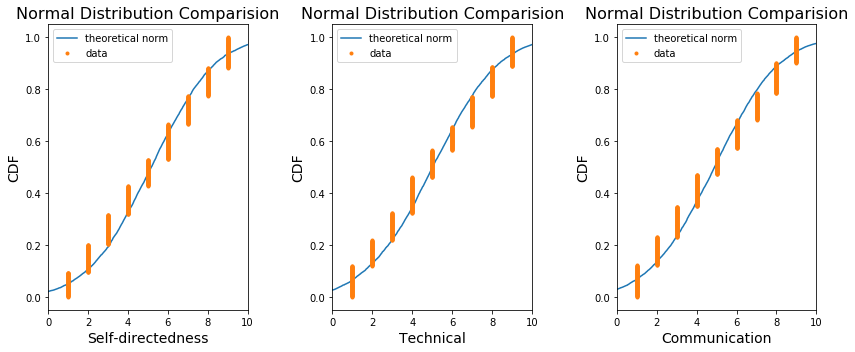

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
%matplotlib inline 
rcParams['figure.figsize'] = (12,5)

#data prep
df = pd.DataFrame(X1)
df.columns = ['Self-directedness' , 'Technical', 'Communication']

#add total column to sum up the attributes for analysis
df['Total'] = df.sum(axis=1)

#ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#function to calculate and plot the graph for Normal Distribution Comparison
def normal_dist_cmp(var):
    arr= df[var]
    # Compute mean and standard deviation: mu, sigma
    mu = np.mean(arr)
    sigma = arr.std()

    # Sample out of a normal distribution with this mu and sigma: samples
    samples = np.random.normal(mu, sigma, 10000)

    # Get the CDF of the samples and of the data
    x_theor,y_theor=ecdf(samples)
    x,y=ecdf(arr)

    # Plot the CDFs and show the plot
    _ = plt.plot(x_theor, y_theor, label='theoretical norm')
    _ = plt.plot(x, y, marker='.', linestyle='none', label='data')
    _ = plt.xlabel(var, fontsize=14)
    _ = plt.ylabel('CDF', fontsize=14)
    _ = plt.title('Normal Distribution Comparision', fontsize=16)
    _ = plt.legend(loc='best')

    return mu, sigma

plt.subplot(1,3,1)
plt.xlim(0,10)
mu, sigma = normal_dist_cmp('Self-directedness')
print ("Mean = " + str(mu))
print ("Standard Deviation = " + str(sigma))

plt.subplot(1,3,2)
plt.xlim(0,10)
mu, sigma = normal_dist_cmp('Technical')
print ("Mean = " + str(mu))
print ("Standard Deviation = " + str(sigma))

plt.subplot(1,3,3)
plt.xlim(0,10)
mu, sigma = normal_dist_cmp('Communication')
print ("Mean = " + str(mu))
print ("Standard Deviation = " + str(sigma))

plt.tight_layout()
plt.show()


Basically, they looked the same. The attributes pretty much conform to a normal distribution just as would be expected, since they are generated from the same random function.

Similarly, if we were to plot the Total of the attributes. We see a normal distribution as well.

### Getting to y

Next we plot for the Total score.

We will make use of the mean and standard deviation of the Total score. We should allocate the '1's to a subset that is beyond the standard deviation. Let's make it 1.5 times standard deviation.

Mean = 15.00625
Standard Deviation = 4.608172631993921


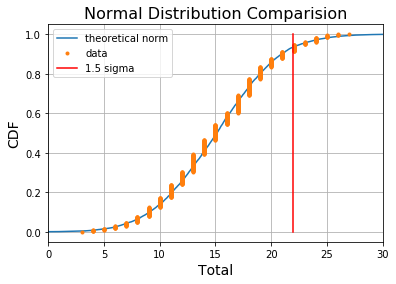

In [4]:
mu, sigma = normal_dist_cmp('Total')
print ("Mean = " + str(mu))
print ("Standard Deviation = " + str(sigma))
plt.xlim(0,30)
plt.grid(True)

#plotting the desired score that is at least 1.5 times sigma
desiredscore = mu + 1.5*sigma
plt.plot([desiredscore,desiredscore], [0,1], '-r', label='1.5 sigma')
plt.legend(loc='best')

plt.show()

Looking at the above chart, it is about the 92nd percentile, which should allow for some variance in data. Given that the admission rate is 3.75%  Some top-percentiled applicants may change their minds for varying reasons and not accept the offer when offered admission. Hence it should be reasonable to randomly allocate the '1's to this subset scoring 22 and above.

Let me lay down the plan of attack at this point:

    1. create a target variable in our dataset called 'Target' and initialise all to 0.

    2. extract the subset of the top percentile that scored 22 and above.
    
    3. randomly assign the value 1 to the 'Target' variable of 30 applicants in this subset.

Here's the code:


In [5]:
#initialise all targets to 0
df['Target'] = 0

print('Number of applicants who scored 22 and above : ' + str( len(df[df['Total']>=22]) ) )

#retrieve array of indices of applicants who scored 22 and above
top_idx = df[df['Total']>=22].index
top_idx = list(top_idx)

#random selection of admitted applicants
import random
random.seed(23)
selected_idx = random.sample(top_idx, num_admitted)  #this is a different function from np.random.sample

#assign 1 to Target
for i in selected_idx:
    df.loc[i,'Target']=1

print('Number of applicants who are admitted : ' + str( len(df[df['Target']==1]) ) )    

#test whether our plan worked
assert(len(df[df['Target']==1]) == num_admitted)

Number of applicants who scored 22 and above : 70
Number of applicants who are admitted : 30


Our plan worked! We now have our apprentices for the AIAP!

Let's print out the list:


In [6]:
print(df[df['Target']==1])

     Self-directedness  Technical  Communication  Total  Target
16                   7          9              8     24       1
24                   9          9              9     27       1
26                   8          9              9     26       1
53                   9          9              4     22       1
81                   8          8              8     24       1
100                  9          7              8     24       1
144                  7          9              9     25       1
168                  9          7              8     24       1
182                  9          6              7     22       1
186                  6          9              8     23       1
209                  9          9              8     26       1
230                  6          9              8     23       1
260                  8          6              8     22       1
293                  6          7              9     22       1
305                  6          8       

Now let's get our y! We also add a new feature Total to X.

In [7]:
y = np.array(df['Target'])

#needs to reshape to 2D
y = y.reshape((y.shape[0], 1))

#add new feature Total
total = df['Total'].values
total = total.reshape((total.shape[0], 1))

X1 = np.array(X1)
X2 = np.append(X1, total, axis=1)

print (X2.shape)
print (y.shape)

(800, 4)
(800, 1)


Lastly, we scale the units (also known as normalisation) so that the training is improved, accurate and faster.

In [8]:
X_max = np.amax(X2, axis=0) # maximum of X array
# scale units
X = X2/X_max


## Creating a neural network class

In [9]:
class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 4
    self.outputSize = 1
    self.hiddenSize = 4

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (4x4) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (4x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 4x4 weights
    self.z2 = self.relu(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 4x1 weights
    o = self.relu(self.z3) # final activation function using relu
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))
  
  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def relu(self, r):
    return np.maximum(0, r)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*o # applying derivative of relu (which is actually oo) to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    oo = self.forward(X)
    self.backward(X, y, oo)
  
  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")  
    
  def loadWeights(self):
    self.W1 = np.loadtxt("w1.txt")
    self.W2 = np.loadtxt("w2.txt")
    
  #for debugging
  def W1(self):
    return self.W1

  def W2(self):
    return self.W2

NN = Neural_Network()

#saving our initial weights
NN.saveWeights()

#defining our output
o = NN.forward(X)

#Printing the sample outputs
print ("Predicted Output: \n" + str(o[16:27])) 
print ("Actual Output: \n" + str(y[16:27]))

Predicted Output: 
[[0.79491503]
 [0.54292678]
 [0.51726622]
 [0.34818167]
 [0.40340588]
 [0.41529409]
 [0.35718479]
 [0.55226923]
 [0.90689974]
 [0.3892942 ]
 [0.86101798]]
Actual Output: 
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]


Now that's an untrained neural network. 

Could it be that when the predicted output is high (>70%), the actual output is 1? Let's plot the predicted results vs the actual.

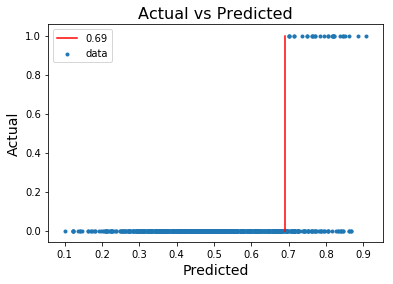

In [10]:
plt.scatter(o, y, marker='.', label='data')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.plot([0.69,0.69], [0,1], '-r', label='0.69')
plt.legend(loc='best')
plt.title('Actual vs Predicted', fontsize=16)
plt.show()

Not quite! We have gotton it backwards. Instead, when the _actual_
result is 1 ("admitted"), the _predicted_ result from the NN is more than 0.69!

We shall now do some training for our neural network.

## Backpropagation 

Or training with weights (_Honey, I am gonna go to the gym for some backpropagation!!_)

In [11]:
o_train = o

for i in range(5): # trains the NN 5 times
  #print samples
  print ("Training #" + str(i+1) + "\n" )    
  print ("Input: \n" + str(X[16:27]) )
  print ("Actual Output: \n" + str(y[16:27]) )
  o_train = NN.forward(X)
  print ("Predicted Output: \n" + str(o_train[16:27]) )
  print ("Loss: \n" + str( np.mean( np.square(y - o_train) ) )  )# mean sum squared loss
  print ("\n" )
  NN.train(X, y)

Training #1

Input: 
[[0.77777778 1.         0.88888889 0.88888889]
 [1.         0.22222222 0.33333333 0.51851852]
 [0.88888889 0.22222222 0.44444444 0.51851852]
 [0.44444444 0.33333333 0.33333333 0.37037037]
 [0.33333333 0.33333333 0.88888889 0.51851852]
 [0.22222222 0.77777778 0.44444444 0.48148148]
 [0.33333333 0.44444444 0.44444444 0.40740741]
 [0.77777778 0.22222222 0.88888889 0.62962963]
 [1.         1.         1.         1.        ]
 [0.22222222 0.88888889 0.11111111 0.40740741]
 [0.88888889 1.         1.         0.96296296]]
Actual Output: 
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]]
Predicted Output: 
[[0.79491503]
 [0.54292678]
 [0.51726622]
 [0.34818167]
 [0.40340588]
 [0.41529409]
 [0.35718479]
 [0.55226923]
 [0.90689974]
 [0.3892942 ]
 [0.86101798]]
Loss: 
0.2606619038720009


Training #2

Input: 
[[0.77777778 1.         0.88888889 0.88888889]
 [1.         0.22222222 0.33333333 0.51851852]
 [0.88888889 0.22222222 0.44444444 0.51851852]
 [0.44444444 0.33333333 0

We can see that something is not quite right.

We got a loss value of 0.26 for the initial training. Subsequent trainings quickly got to a loss value of 0.0375 which is equal to the probability of admission we calculated earlier. 

The 4 sets of predicted output after the initial training are all zeros. Let's do a quick check on our predicted outputs.

In [12]:
o_train.max()

0.0

In [13]:
o_train.mean()

0.0

Not good. o_train is a _set of all zeros_. It has to be when the maximum value is 0.0 and the mean is 0.0.

So where do we go from here? Is our neural network wasted?

Let us look back on our _untrained_ neural network.

Let us revisit the _0.69_ figure from the graph which I will reproduce here:

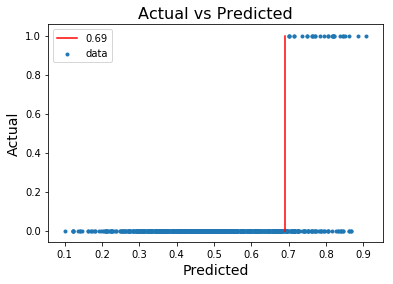

In [14]:
plt.scatter(o, y, marker='.', label='data')
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.plot([0.69,0.69], [0,1], '-r', label='0.69')
plt.title('Actual vs Predicted', fontsize=16)
plt.legend(loc='best')

plt.show()

When our model predicts an output of more than 0.69, the graph is telling us that a percentage of that got admitted. Not _ALL_. Could we find out this percentage?

Moving forward, we will use our untrained neural network. Just one forward propagation is all that is required. No training required, no backpropagation, no weights training, no need to go to the gym! 


## Classification Threshold

So can we take the 0.69 as a classification threshold? Any prediction that is more than 0.69 has a chance of being admitted. What is that chance? Let us find out.

In [15]:
# stack o and y together, column-wise 
c = np.hstack((o, y))

print(pd.DataFrame(c, columns=['Predicted', 'Actual'])[16:27])

    Predicted  Actual
16   0.794915     1.0
17   0.542927     0.0
18   0.517266     0.0
19   0.348182     0.0
20   0.403406     0.0
21   0.415294     0.0
22   0.357185     0.0
23   0.552269     0.0
24   0.906900     1.0
25   0.389294     0.0
26   0.861018     1.0


In [16]:
#set of predictions > 0.69
c69 = c[c[:,0]>0.69]

print(pd.DataFrame(c69, columns=['Predicted', 'Actual']).head())

   Predicted  Actual
0   0.710806     0.0
1   0.693809     0.0
2   0.705366     0.0
3   0.794915     1.0
4   0.906900     1.0


In [17]:
#sum up right side column
admitted = c69[:,1].sum()

#Number of predictions more than 0.69
size69 = len(c69) 

#Probability of admission from "the more than 0.69" subset
p69admitted = admitted/size69

print("Number admitted : " + str(admitted))
print("Number of predictions of > 0.69 : " + str(size69))
print("Percentage of 0.69 clubbers admitted : " + str(p69admitted))

Number admitted : 30.0
Number of predictions of > 0.69 : 111
Percentage of 0.69 clubbers admitted : 0.2702702702702703


Hence, out of 800 candidates, 111 got a prediction score of more than 0.69 out of which 30 got admitted. 

And the chance of that occurring is 0.27. A 27 percent chance.

## Prediction Time!

Can we predict on this model? Let us find out. We will run our untrained neural network, apply a classification threshold of 0.69 to the predictions and then throw a 100-sided die. 1 to 27 and the candidate is admitted! 

In [18]:
#sample of 20 to predict on
num_apps = 20

#Randomising our inputs
a=np.random.randint(1,10,num_apps)
b=np.random.randint(1,10,num_apps)
c=np.random.randint(1,10,num_apps)
d=a+b+c

# X1 = (self-directedness, technical proficiency, communication skills), y1 = 1 or 0 
X3=list(zip(a,b,c,d))

X3

[(7, 9, 3, 19),
 (2, 2, 8, 12),
 (9, 6, 4, 19),
 (9, 8, 3, 20),
 (6, 8, 8, 22),
 (9, 6, 8, 23),
 (4, 4, 3, 11),
 (5, 5, 2, 12),
 (3, 9, 2, 14),
 (9, 6, 6, 21),
 (8, 1, 4, 13),
 (1, 1, 1, 3),
 (3, 1, 1, 5),
 (8, 9, 8, 25),
 (9, 1, 1, 11),
 (5, 2, 4, 11),
 (1, 4, 8, 13),
 (8, 2, 3, 13),
 (3, 5, 5, 13),
 (6, 6, 9, 21)]

In [19]:
# scale units
X_pred = X3/X_max #X_max: maximum of X array


In [20]:
#load the weights saved at initial forward propagation
NN.loadWeights()

#predicting by the forward function of our NN
o_pred = NN.forward(X_pred)

o_pred.resize(len(o_pred),1)
print(o_pred)

[[0.69380907]
 [0.32286043]
 [0.70180272]
 [0.7509089 ]
 [0.71436959]
 [0.78268749]
 [0.38284536]
 [0.44316961]
 [0.49006084]
 [0.74224511]
 [0.48260253]
 [0.10076664]
 [0.19253016]
 [0.84079679]
 [0.46782071]
 [0.37962094]
 [0.34630605]
 [0.49704503]
 [0.41206967]
 [0.66526341]]


In [21]:
#stacking column-wise
c_pred = np.hstack((X3, o_pred))
print(c_pred)

[[ 7.          9.          3.         19.          0.69380907]
 [ 2.          2.          8.         12.          0.32286043]
 [ 9.          6.          4.         19.          0.70180272]
 [ 9.          8.          3.         20.          0.7509089 ]
 [ 6.          8.          8.         22.          0.71436959]
 [ 9.          6.          8.         23.          0.78268749]
 [ 4.          4.          3.         11.          0.38284536]
 [ 5.          5.          2.         12.          0.44316961]
 [ 3.          9.          2.         14.          0.49006084]
 [ 9.          6.          6.         21.          0.74224511]
 [ 8.          1.          4.         13.          0.48260253]
 [ 1.          1.          1.          3.          0.10076664]
 [ 3.          1.          1.          5.          0.19253016]
 [ 8.          9.          8.         25.          0.84079679]
 [ 9.          1.          1.         11.          0.46782071]
 [ 5.          2.          4.         11.          0.37

In [22]:
#getting the 0.69 club
c_pred69 = c_pred[c_pred[:,4]>0.69]
print(c_pred69)

[[ 7.          9.          3.         19.          0.69380907]
 [ 9.          6.          4.         19.          0.70180272]
 [ 9.          8.          3.         20.          0.7509089 ]
 [ 6.          8.          8.         22.          0.71436959]
 [ 9.          6.          8.         23.          0.78268749]
 [ 9.          6.          6.         21.          0.74224511]
 [ 8.          9.          8.         25.          0.84079679]]


Now we will throw our 100-sided die for each of our 0.69 clubbers:

In [23]:
d100_roll = []
np.random.seed(30962)
for x in c_pred69:
    d100_roll.append(np.random.randint(100))
    
d100_roll = np.array(d100_roll)
d100_roll.resize(len(d100_roll), 1)

In [24]:
#numpy power!
results = np.hstack((c_pred69, d100_roll))

#for presentation, a pandas dataframe to frame it nicely
print(pd.DataFrame(results, columns=['Self-directedness' , 'Technical', 'Communication', 'Total', 'NN_Pred', 'd100 Roll']))

   Self-directedness  Technical  Communication  Total   NN_Pred  d100 Roll
0                7.0        9.0            3.0   19.0  0.693809       96.0
1                9.0        6.0            4.0   19.0  0.701803       13.0
2                9.0        8.0            3.0   20.0  0.750909       38.0
3                6.0        8.0            8.0   22.0  0.714370       51.0
4                9.0        6.0            8.0   23.0  0.782687       80.0
5                9.0        6.0            6.0   21.0  0.742245        6.0
6                8.0        9.0            8.0   25.0  0.840797       36.0


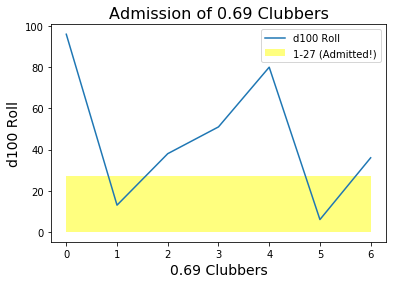

In [25]:
plt.plot(results[:,5], label='d100 Roll')
plt.ylabel("d100 Roll", fontsize=14)
plt.xlabel("0.69 Clubbers", fontsize=14)
plt.fill_between(([0,6]), ([27,27]), facecolor='yellow', alpha=0.5, label='1-27 (Admitted!)')
plt.legend(loc="best")
plt.title('Admission of 0.69 Clubbers', fontsize=16)
plt.show()

Nice! Those in the yellow region got admitted!


## Conclusion

The neural network works in a certain way by giving us as prediction a probability value. Apparently, we have a probability classification threshold of 0.69. We filter those having more than 0.69 prediction into a subset. In this subset, the candiates have a 27 percent chance of being finally admitted. 

The neural network implemented here did not quite _work out_ as expected (_pun intended_). It did not go to the gym!

There is a class imbalance problem inherent. Only a small percentage gets admitted. And consistent with the nature of admissions, similar candidates can have very different results. Luck and/or circumstance can dictate the final result of admission. Tom may have a nervous tic on the day of the interview. Susan may be feeling sick on the weekend where she is required to complete the remote assessment. Joe got offered admission but changed his mind because he is finally offered a nice job with a great package. 

Maybe a neural network is not suited for this analysis. Is this acceptable data science? Expecially the part where we have to throw a 100-sided die following the output of an untrained Neural Network? These and other similar questions I am sure I will be asking myself time and time again. But that is how data science grew and evolve. By probing and testing boundaries and methods. Take it to the edge and let it fall, see if it flies.

It has been fun and exciting embarking on this project and trying out a neural network. And not forgetting getting to know pandas and numpy. ;)

Thank you for reading! ☮

## References

https://enlight.nyc/projects/neural-network/

http://www.fharrell.com/post/classification/

https://www.sciencedirect.com/science/article/pii/S2214579615000611

https://www.scikit-yb.org/en/latest/api/classifier/threshold.html